<a href="https://www.kaggle.com/code/callistusogbodo/using-data-to-guide-smarter-hr-strategies?scriptVersionId=256648102" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This Capstone project was submitted in partial fulfillment of the [Google Advanced Data Analytics Certificate](https://www.coursera.org/specializations/google-advanced-data-analytics). 

# Project Overview

## About the company
Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles

## Business Case
Analyze data from a recent employee survey to come up with ideas for how to increase employee retention. Design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points. 


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pickle

In [2]:
df0 = pd.read_csv("/kaggle/input/salifort-motors-datasets/Files/HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Exploration (Initial EDA and data cleaning)

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0= df0.rename(columns={'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure', 
                         'Work_accident': 'work_accident', 'Department': 'department'})

df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
df1= df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


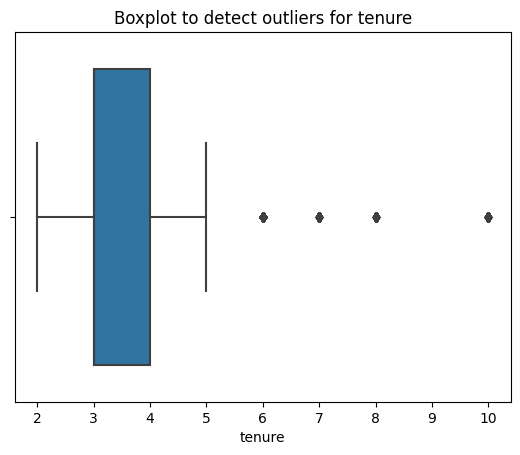

In [11]:
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers

percentile25 = df1['tenure'].quantile(0.25)

percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In this initial EDA, I got to know the data and did some basic data cleaning. There were no missing values in the data.

However, some of the rows were duplicated. Are these legitimate entries, one might wonder? I could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous values across the first 10 columns, it doesn't seem like a legitimate entry, so I proceeded by dropping them. The duplicated rows account for approximately 20% of the data.

Upon checking the distribution of data for the variable 'tenure', there are 824 rows of data outliers. I wouldn't want to do anything to them since they are not much, and I intend to use Random Forest classification models, which handle a certain degree of outliers. 

# Data Exploration (Analyzing Relationships between Variables)

In [13]:
print(df1['left'].value_counts())
print(df1['left'].value_counts(normalize=True)*100)

left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


In [14]:
import warnings
warnings.filterwarnings("ignore")



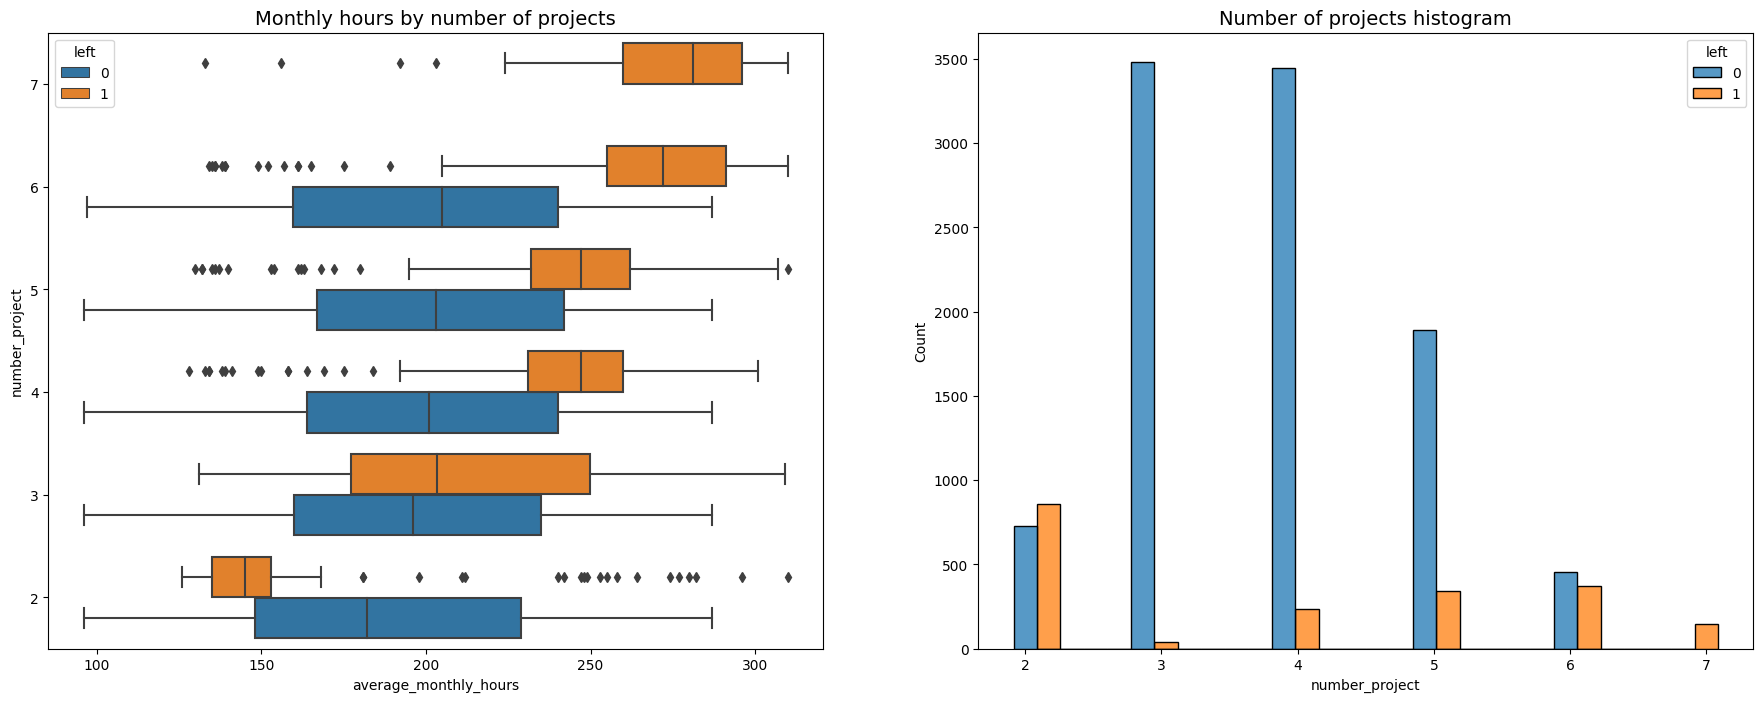

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

#  histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

From the plot above,

- Everyone with seven projects left the company. They worked the most hours with those who had six projects and also left, with some working nearly 300 hours a month.

- People who left the company can be divided into two groups. The first group worked less, while the second group worked more on the same number of projects. The first group might include people who got fired or possibly those who were assigned smaller tasks because they are already on their way out. It might be a valid reason to say that the second group quit, owing to the stress of having too many projects and working too many hours.

- People who had 3 or 4 projects not only have optimal working hours, but also have a lower left/stayed ratio.

- Almost everyone in the company is overworked if you consider the average hours they are supposed to work in a month. Assuming there are _52 weeks in a year and 2 weeks are for vacations, then we expect 50 weeks * 40 hours per week / 12 months = 166.67 hours per month_.

It would be wise to get the number of people who had 7 projects, since all of them left. 


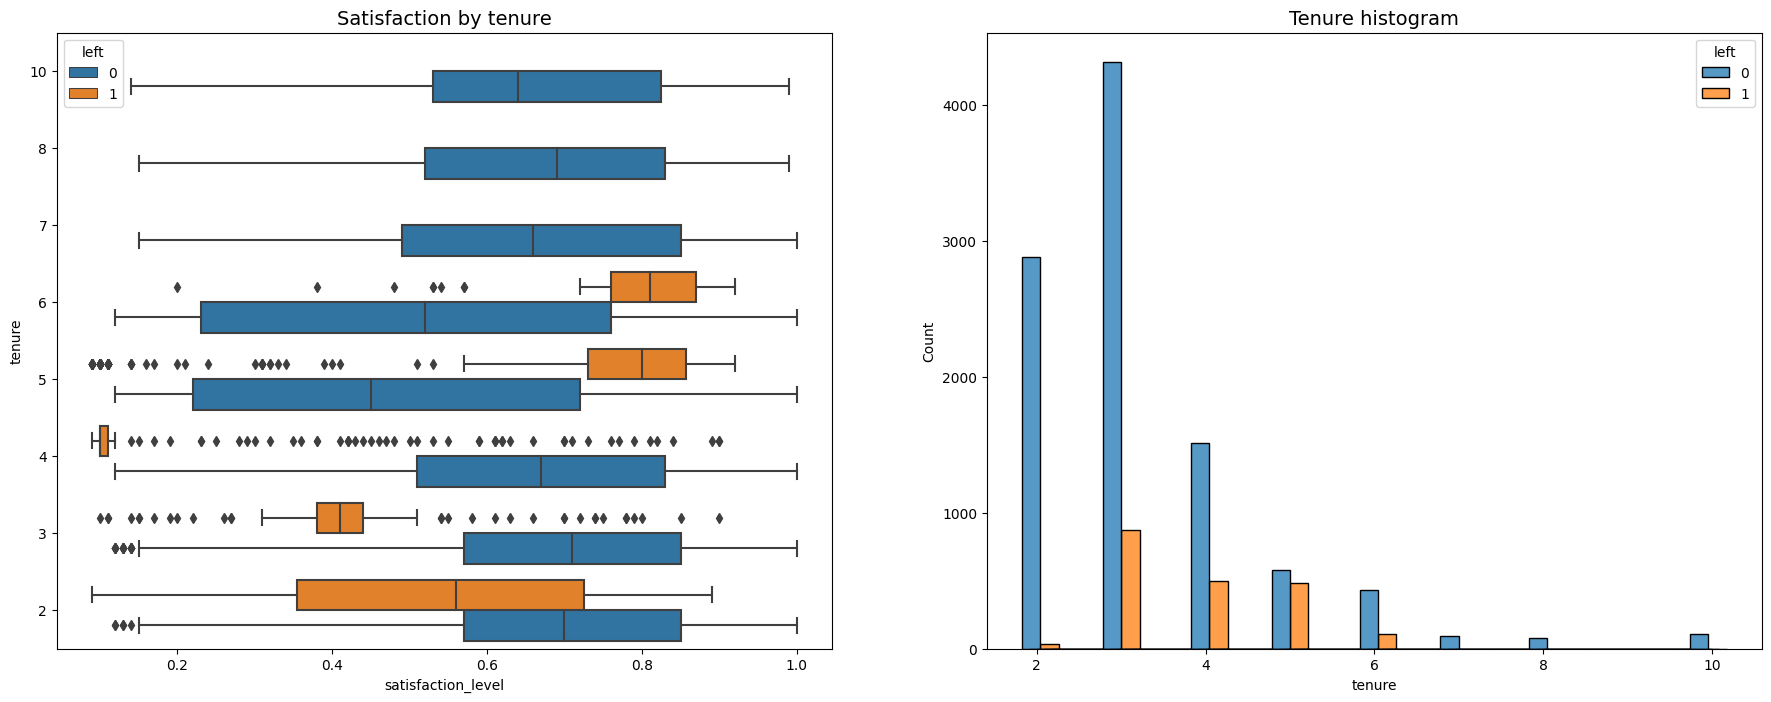

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

From this plot, we can see that 

- Again, two groups of people left: dissatisfied employees with shorter tenures and highly satisfied employees with medium-length tenures.
  
- There is an unusual satisfaction level data distribution for those four-year employers who left. It would be wise to investigate by checking with the company if possible.

- The satisfaction level of high-tenured and newer employees who stayed is relatively high. 

In [17]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, people who stayed have higher average and median satisfaction levels compared to those who left. It is also important to note that the average satisfaction level of those who stayed is slightly lower than the median, suggesting that the satisfaction levels of those who stayed are skewed to the left. 

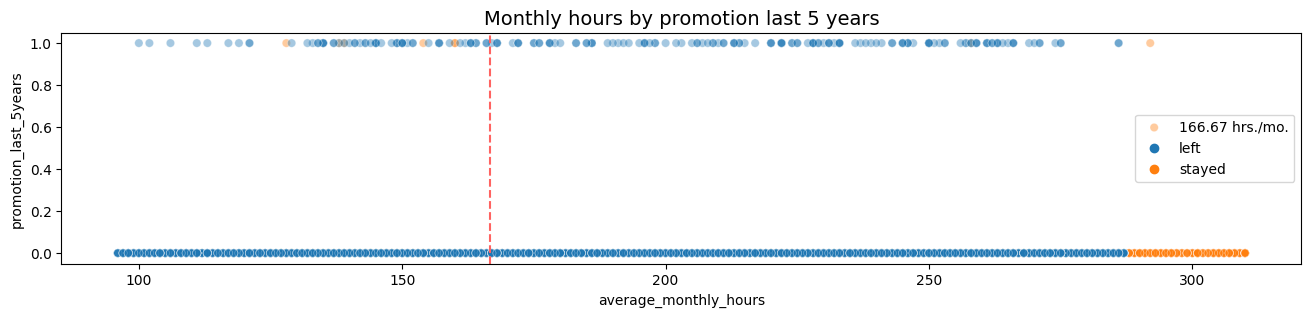

In [18]:
#plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

From the above plot,

- Only a few employees were promoted, and very few employers who worked long hours were promoted in the last 5 years.

- Employees who left worked the longest hours. 

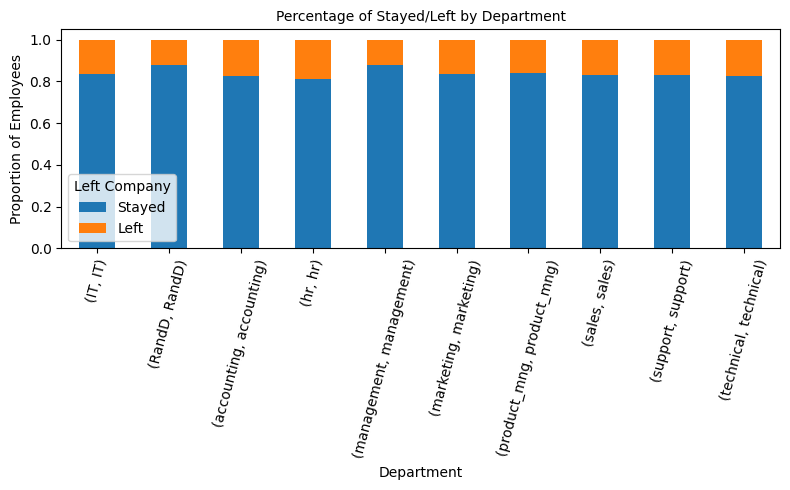

In [19]:
department_pct = (
    df1.groupby(['department', 'left']).size()
    .groupby(level=0).apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

department_pct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Percentage of Stayed/Left by Department', fontsize='10')
plt.ylabel('Proportion of Employees')
plt.xlabel('Department')
plt.xticks(rotation=75)
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()


There is a uniform proportion of those who left/stayed across all departments. 

Text(0.5, 1.05, 'Monthly Hours vs Evaluation: Stayed vs Left')

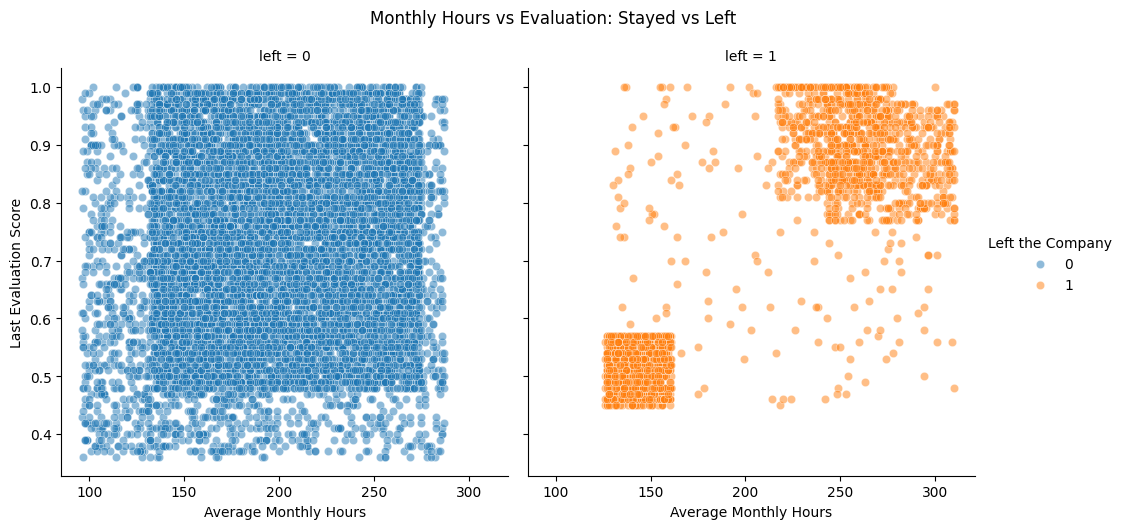

In [20]:
palette = {0: "#1f77b4", 1: "#ff7f0e"}  
g = sns.FacetGrid(df1, col="left", hue="left", palette=palette, height=5)
g.map_dataframe(sns.scatterplot, x='average_monthly_hours', y='last_evaluation', alpha=0.5)
g.set_axis_labels("Average Monthly Hours", "Last Evaluation Score")
g.add_legend(title="Left the Company")
g.fig.suptitle('Monthly Hours vs Evaluation: Stayed vs Left', y=1.05)


From the plot,

- The two groups of people who left show that one group was overworked but had high evaluation scores, while the other group worked slightly below the normal average hours but received poor evaluation scores.

- Hours worked and the evaluation score seem to correlate.

- Most of the employees worked more than 167 hours per month.

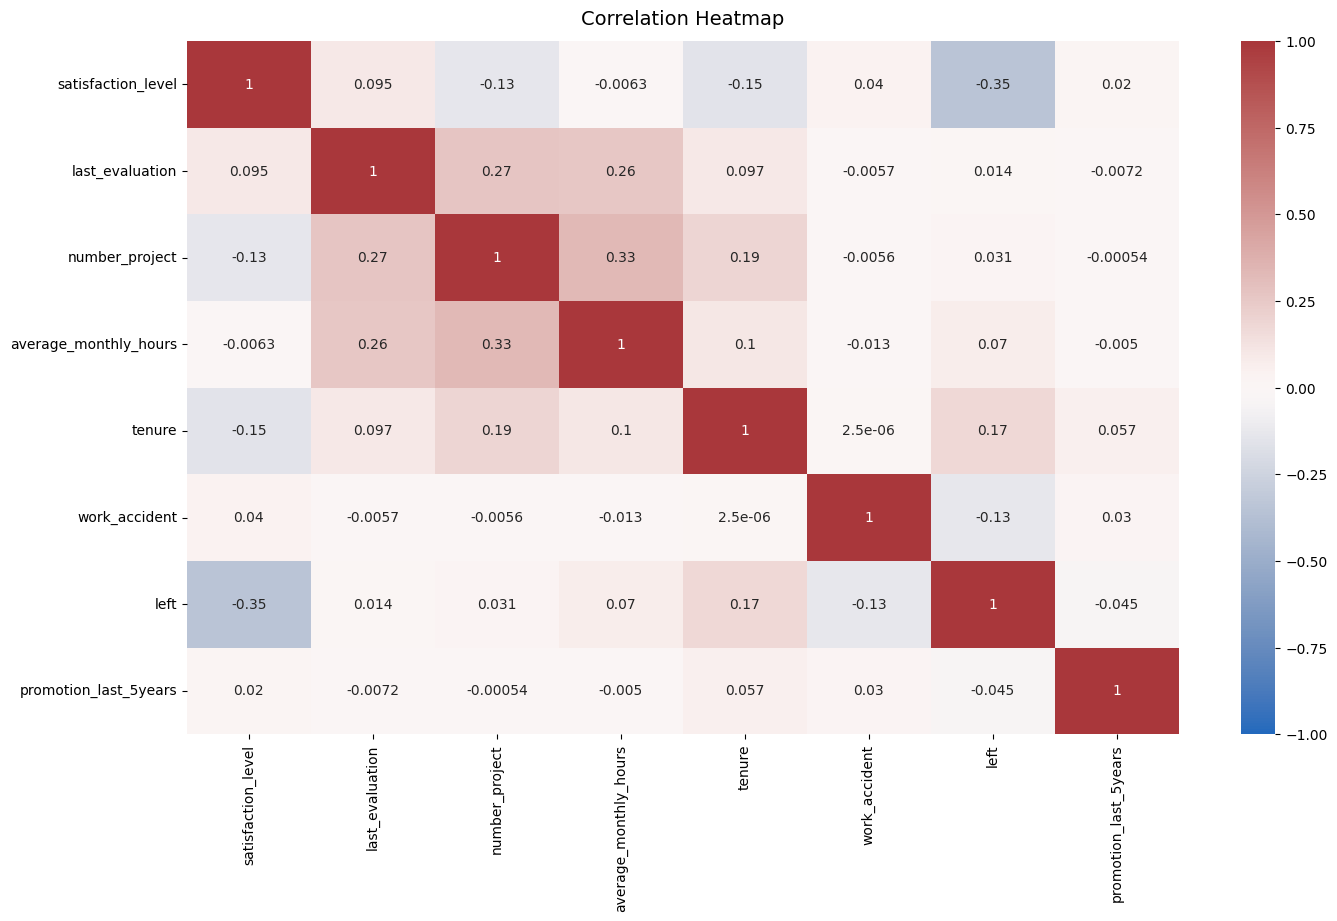

In [21]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.drop(['department', 'salary'], axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap indicates that the monthly hours, the number of projects worked, and the satisfaction levels all exhibit a positive correlation. The tendency of an employee to leave is negatively correlated with their satisfaction levels.

A major insight from this EDA is that management is clearly poor. Many employees left because of longer working hours, multiple projects, and generally low satisfaction scores. It is also unfavorable to work these many hours and receive no promotions and low evaluation scores. Finally, those who spent more than six years are less likely to leave. 

# Model Building

There are many classification models available, but I prefer to use the Random Forest classification model because of its robustness and performance, as I mentioned earlier. Since there is a class imbalance in the dependent variable 'left', my priority is to tune the model to identify as many people who leave as possible. To focus on minimizing false negatives, I will use recall as the main evaluation metric when tuning and assessing the model.

To begin, we encode the categorical variables. 

In [22]:
df_model = df1.copy()

df_model['salary'] = (
    df_model['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


Next, we split the data into three parts: training, validation, and test sets.

In [23]:
X = df_model.drop('left', axis=1)
y = df_model['left']
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42)

In [24]:
for x in [X_train, X_val, X_test]:
    print(len(x))

7194
2398
2399


We continue by instantiating the model and running a grid search for hyperparameter tuning.  

In [25]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')


# dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [100, 200, 300, 400],
             }

# list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

Now we train the model.

In [26]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 47.1 s, sys: 49.7 ms, total: 47.1 s
Wall time: 47.2 s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 300, 400]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [27]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [28]:
rf_cv.best_score_

0.9062675360822428

In [29]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          }
                         )

    return table

In [30]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.966597,0.906268,0.935114,0.979149


After training and cross-validation, we have a random forest model with optimum parameters. The mean recall, precision, f1, and accuracy scores across the validation folds are relatively high. 

The next step is to use the best random forest model to predict on the validation data. 

## Model Selection

In [31]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [32]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [33]:
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.966597,0.906268,0.935114,0.979149
0,RF val,0.976127,0.924623,0.949677,0.983736


Beautiful! The model performed well in predicting the validation data. Now, let's see how it will do on the test data. 

In [34]:
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

rf_test_scores = get_test_scores('RF test', rf_test_preds, y_test)

results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.966597,0.906268,0.935114,0.979149
0,RF val,0.976127,0.924623,0.949677,0.983736
0,RF test,0.976190,0.927136,0.951031,0.984160


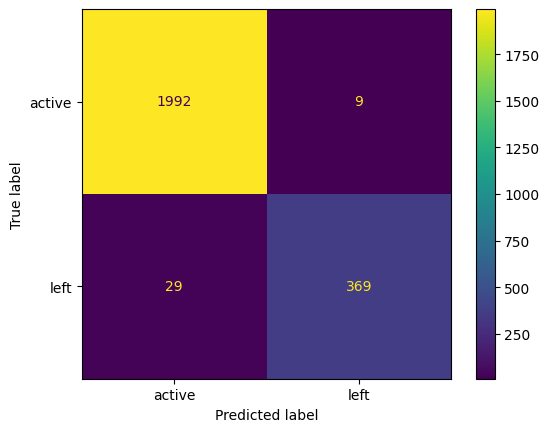

In [35]:
cm = confusion_matrix(y_test, rf_test_preds, labels=rf_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['active', 'left'])
disp.plot();

The model predicts more false negatives than false positives, meaning that some employees who are genuinely at risk of leaving or being fired are not identified by the model. However, the number of missed cases remains relatively small, showing that the model is still effective at capturing most at-risk employees.

It would be helpful to analyze the variables in the data that contributed to the predictions outcomes. 

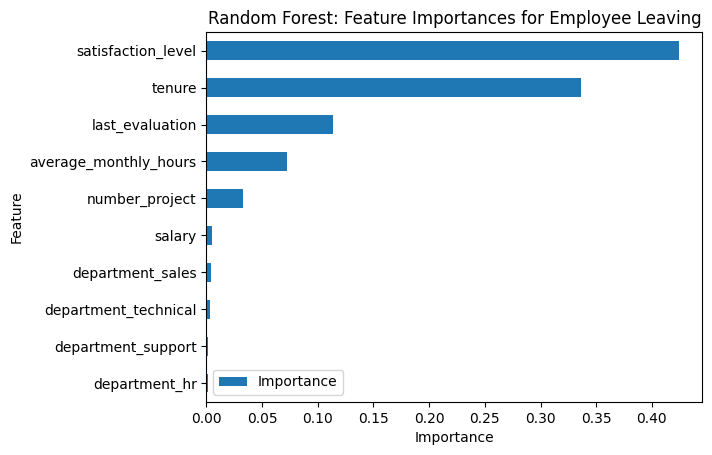

In [36]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

From the plot above, it is clear that 'satisfaction_level', 'tenure', 'last_evaluation', 'average_monthly_hours', and 'number_project' had the greatest influence on predicting the outcome, respectively. 

# Results and Evaluation

## Summary of Model Results

The Random Forest model achieved a precision of 97.6%, a recall of 92.7%, an F1 score of 95.1%, and an accuracy of 98.4% on the test set.

## Conclusions and Recommendations

As pointed out in the EDA and also in the models' feature importance plot, the employees are overworked. 

To support employee retention, the following recommendations are proposed:

- Limit the number of projects assigned to each employee to help manage workload and reduce burnout.

- Review the experiences of employees who have been with the company for four years or more. Consider promoting them where appropriate or investigating potential reasons for dissatisfaction within this group.

- Create a fair approach to longer working hours. Either recognize and reward extended efforts or avoid making them a requirement.

- Ensure all employees clearly understand overtime policies and expectations around working hours and time off. Communicate these policies openly and make sure they are consistently applied.

- Encourage open conversations about the company culture. Hold discussions at both the company and team levels to understand concerns and identify areas for improvement.

- Avoid tying high evaluation scores only to employees who work excessively long hours. Use a performance recognition system that rewards effort, contribution, and quality of work, not just time spent.